# 🎧 Spotify Songs Popularity Analysis using Machine Learning

# 📌 Objective
This notebook aims to analyze Spotify song attributes to predict song popularity using machine learning methods, including linear regression, correlation analysis, normalization, and data transformation techniques.

---

# 📂 Dataset Information
The dataset contains various attributes of Spotify songs:

- `popularity` (Target variable)
- `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, `track_genre`

**Download Dataset:**  
👉 [Spotify Dataset (Kaggle)](https://www.kaggle.com/datasets/geomack/spotifyclassification)

After downloading, place `spotify.csv` in the `datasets/` folder.


In [59]:
# 🔧 Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import normaltest, boxcox


In [60]:
# 📥 Load Dataset
spotify_df = pd.read_csv('../datasets/spotify.csv')

# Display the first few rows of the dataset
spotify_df.head()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [61]:
# ❗ Check for Missing Values
missing_percentage = spotify_df.isnull().mean() * 100
print("Percentage of Missing Values:\n", missing_percentage)


Percentage of Missing Values:
 Unnamed: 0          0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
speechiness         0.0
tempo               0.0
time_signature      0.0
valence             0.0
target              0.0
song_title          0.0
artist              0.0
dtype: float64


## 📊 Visualize Popularity Distribution

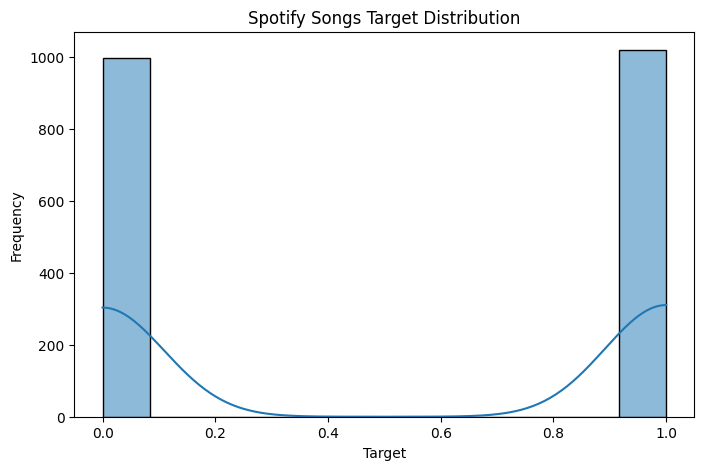

In [62]:
# 📊 Visualize Target Distribution (popularity)
plt.figure(figsize=(8,5))
sns.histplot(spotify_df['target'], kde=True)
plt.title('Spotify Songs Target Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.savefig('../visuals/Spotify_Songs_Target_Distribution.png')
plt.show()


## 📈 Correlation Heatmap

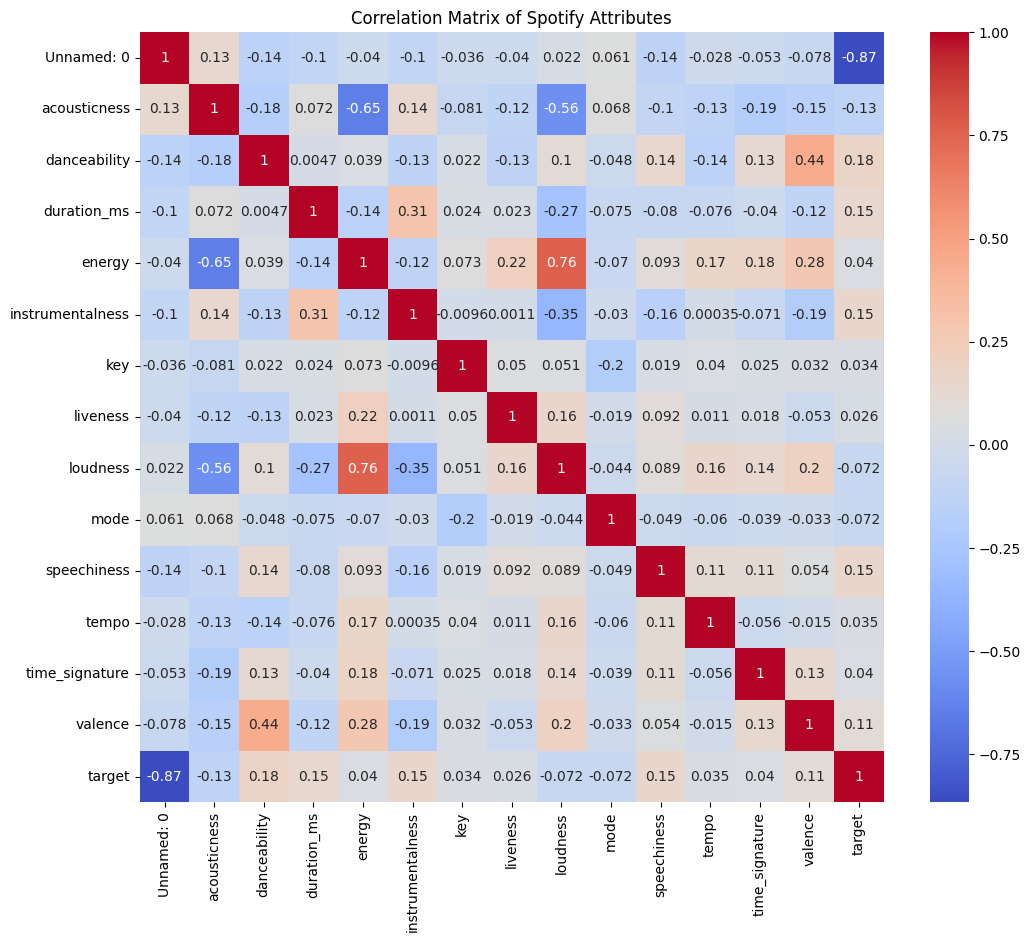

In [63]:
# 📈 Correlation Heatmap (only numeric columns)
plt.figure(figsize=(12,10))

# Selecting only numeric columns
numeric_df = spotify_df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Spotify Attributes')
plt.savefig('../visuals/Correlation_Matrix.png')
plt.show()


## 🎯 Simple Linear Regression (Danceability → Popularity)

In [64]:

# Prepare Data
X_simple = spotify_df[['danceability']]
y = spotify_df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression Model
simple_reg = LinearRegression()
simple_reg.fit(X_train, y_train)

# Predictions
y_pred_simple = simple_reg.predict(X_test)

# Evaluate Model
print("Simple Linear Regression R²:", r2_score(y_test, y_pred_simple))
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
print("Simple Linear Regression RMSE:", rmse_simple)


Simple Linear Regression R²: 0.017639731910785716
Simple Linear Regression RMSE: 0.49547327539768815


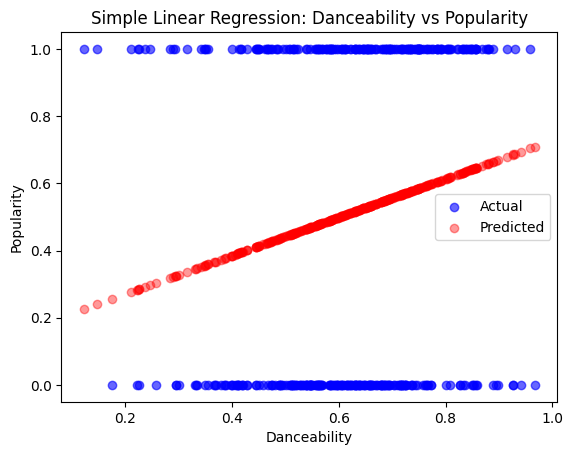

In [65]:
# Visualize Actual vs Predicted Values (Simple Regression)
plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(X_test, y_pred_simple, label='Predicted', color='red', alpha=0.4)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Simple Linear Regression: Danceability vs Popularity')
plt.legend()
plt.savefig('../visuals/Simple_Linear_Regression.png')
plt.show()


## 🚀 Multiple Linear Regression (Multiple Features → Popularity)

In [66]:
# Multiple features for prediction
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X_multi = spotify_df[features]
y_multi = spotify_df['target']

# Split dataset
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression Model
multi_reg = LinearRegression()
multi_reg.fit(X_train_m, y_train_m)

# Predictions
y_pred_multi = multi_reg.predict(X_test_m)

# Evaluate Multiple Linear Regression
print("Multiple Linear Regression R²:", r2_score(y_test_m, y_pred_multi))
rmse_multi = np.sqrt(mean_squared_error(y_test_m, y_pred_multi))
print("Multiple Linear Regression RMSE:", rmse_multi)



Multiple Linear Regression R²: 0.08878316698565114
Multiple Linear Regression RMSE: 0.477194805113626


## 📉 Residual Analysis (Multiple Regression)

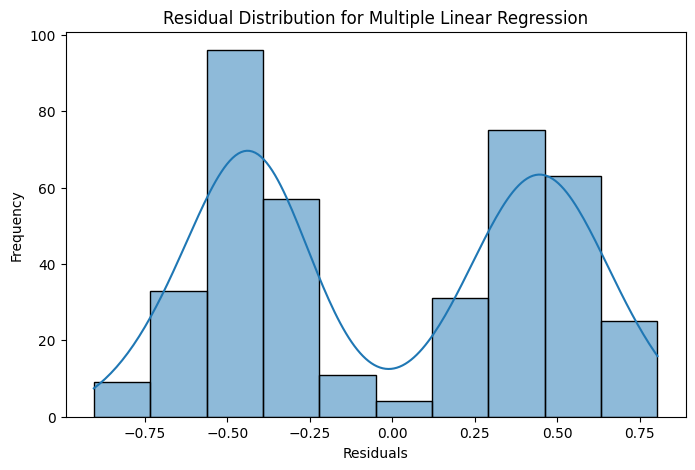

In [67]:
residuals = y_test_m - y_pred_multi

# Visualize Residual Distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution for Multiple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('../visuals/Multiple_Linear_Regression.png')
plt.show()


## 📌 Normality Test (D'Agostino K² Test)

In [68]:
# Check normality of 'popularity'
stat, p_val = normaltest(spotify_df['target'])
print("Original Data - Normality Test p-value:", p_val)


Original Data - Normality Test p-value: 0.0


## 🛠️ Data Transformation & Comparison (Boxcox, Log, Sqrt)

In [69]:
transformations = {
    'Log Transformation': np.log1p(spotify_df['target']),
    'Square Root Transformation': np.sqrt(spotify_df['target']),
    'Boxcox Transformation': boxcox(spotify_df['target'] + 1)[0]
}

results = {}
for name, data in transformations.items():
    stat, p = normaltest(data)
    results[name] = {'p-value': p, 'Normality': 'Pass' if p > 0.05 else 'Fail'}

results_df = pd.DataFrame(results).T
results_df


,p-value,Normality
Log Transformation,0.0,Fail
Square Root Transformation,0.0,Fail
Boxcox Transformation,0.0,Fail


## 📊 Visualize Transformations

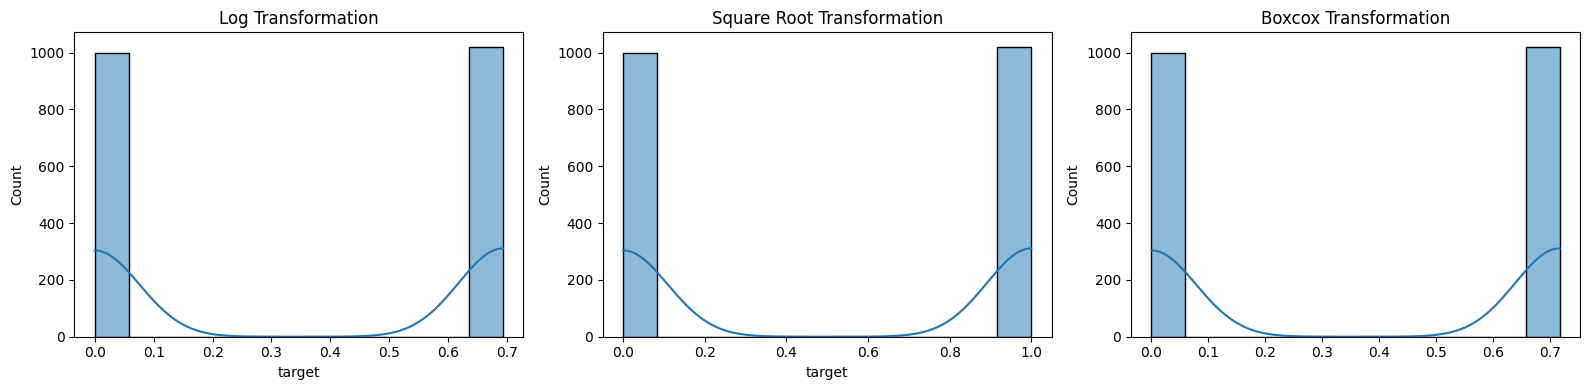

In [70]:
plt.figure(figsize=(16,4))

for i, (name, data) in enumerate(transformations.items(), 1):
    plt.subplot(1, 3, i)
    sns.histplot(data, kde=True)
    plt.title(name)

plt.tight_layout()
plt.savefig('../visuals/Transformations.png')
plt.show()
